<a href="https://colab.research.google.com/github/ychengbf/ECON441B/blob/main/Week_8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [190]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [192]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [193]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/bank-additional-full.csv", sep = ";")

In [194]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [195]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [196]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

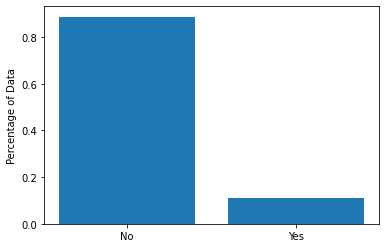

In [197]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [198]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [199]:
###############
###TRANSFORM###
###############

# X_scaled = #???
# y_train = #???
# imbalance issue, transformation that could be applied is oversampling the minority class ("yes") using SMOTE.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [200]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.299\nsamples = 20023\nvalue = [16367, 3656]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.114\nsamples = 10601\nvalue = [9959, 642]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.097\nsamples = 10397\nvalue = [9868, 529]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 204\nvalue = [91, 113]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.435\nsamples = 9422\nvalue = [6408, 3014]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.489\nsamples = 6860\nvalue = [3934, 2926]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.066\nsamples = 2562\nvalue = [2474, 88]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.417\nsamples = 31137\nvalue = [9213, 21924]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.827\ngini = 0.337\nsamples = 25616\nvalue = [5490, 20126]\nclass 

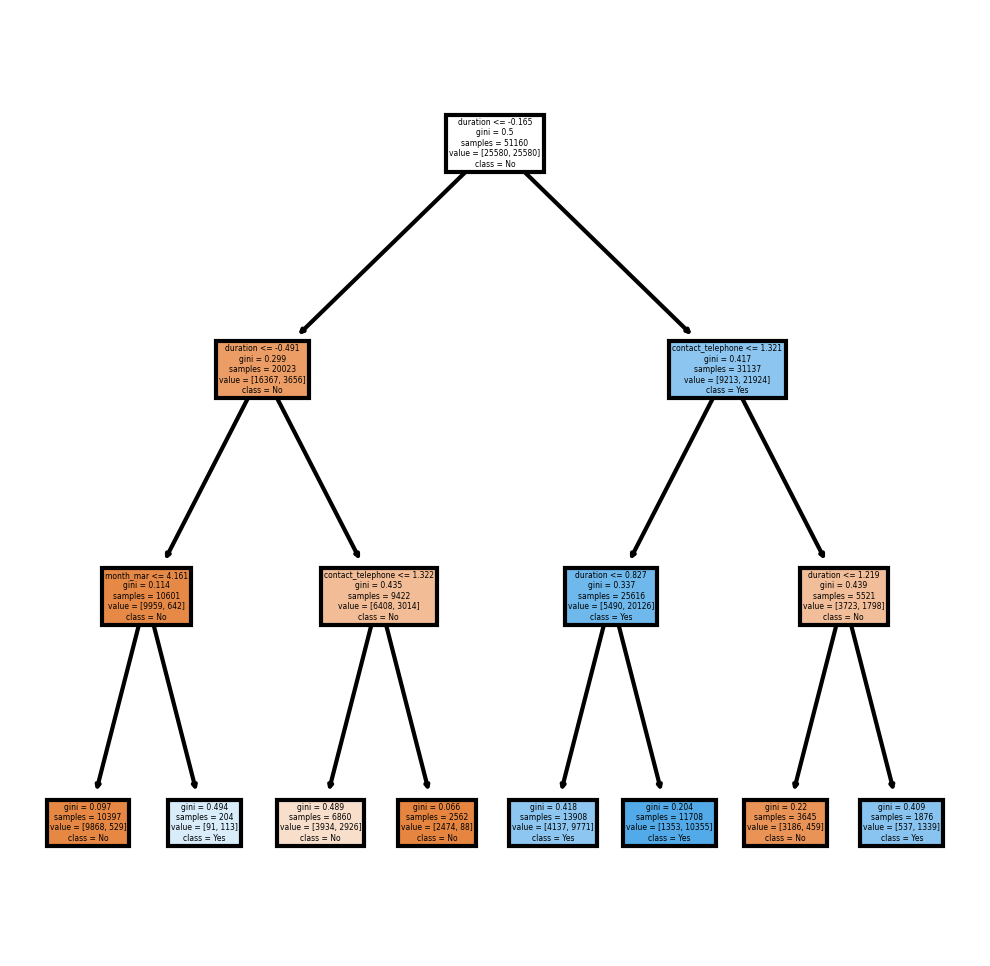

In [201]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [202]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

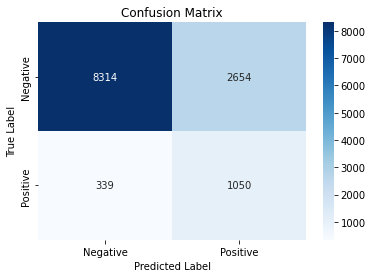

In [203]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [204]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7535000404628955


In [205]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

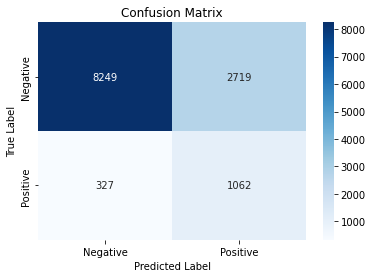

In [206]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [207]:
from sklearn.ensemble import AdaBoostClassifier

In [208]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [209]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

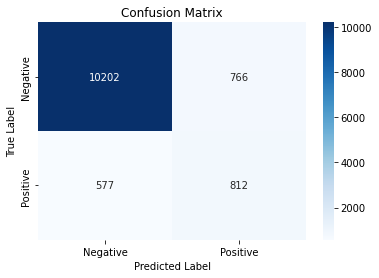

In [210]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [211]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
####IMPORT MORE BASE LEARNERS####

In [215]:
### SET YOUR BASE LEARNERS
base_learners = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    LGBMClassifier()
]

super_learner = SuperLearner(scorer=accuracy_score, random_state=42, verbose=2)
super_learner.add(base_learners)
### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)
### GET base_predictions
base_predictions = super_learner.predict(X_scaled)



Fitting 1 layers
Processing layer-1             

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

done | 00:01:20
Fit complete                        | 00:01:20

Predicting 1 layers
Processing layer-1             done | 00:00:01
Predict complete                    | 00:00:01


In [216]:
### TRAIN YOUR METALEARNER

In [217]:
log_reg = LogisticRegression().fit(base_predictions, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [218]:
### INTERPRET COEFFICIENTS

In [219]:
print("Metalearner Coefficients:", log_reg.coef_)

Metalearner Coefficients: [[ 0.37444407  0.38665423  0.7465044   0.19807448 13.15601218  1.67725332]]


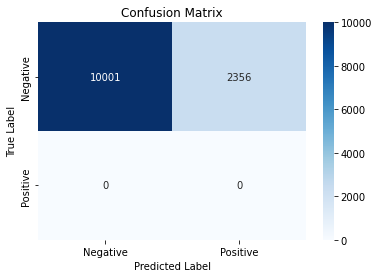

In [220]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_test_binary = np.argmax(y_test.values, axis=1)
meta_predictions_binary = np.argmax(meta_predictions, axis=1)

cm = confusion_matrix(y_test_binary, meta_predictions_binary)
class_labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificities (Out of Sample)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Fitting 1 layers
Processing layer-1             

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

done | 00:01:14
Fit complete                        | 00:01:14

Predicting 1 layers
Processing layer-1             done | 00:00:00
Predict complete                    | 00:00:01


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


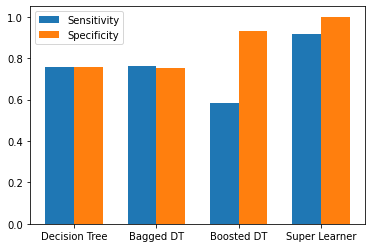

In [225]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train) # fit the decision tree model

# empty lists to store sensitivities and specificities for each model
sensitivities = []
specificities = []

# Decision Tree
y_pred_dt = dtree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
sensitivities.append(tp / (tp + fn))
specificities.append(tn / (tn + fp))

# Bagged Decision Trees
bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)
bagging.fit(X_scaled, y_train)
y_pred_bag = bagging.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_bag).ravel()
sensitivities.append(tp / (tp + fn))
specificities.append(tn / (tn + fp))

# Boosted Decision Trees
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)
adaboost.fit(X_scaled, y_train)
y_pred_boost = adaboost.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_boost).ravel()
sensitivities.append(tp / (tp + fn))
specificities.append(tn / (tn + fp))

# Super Learner
base_learners = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    LGBMClassifier()
]
super_learner = SuperLearner(scorer=accuracy_score, random_state=42, verbose=2)
super_learner.add(base_learners)
super_learner.fit(X_scaled, y_train)
meta_predictions = super_learner.predict_proba(X_test)
y_test_binary = np.argmax(y_test.values, axis=1)
meta_predictions_binary = np.argmax(meta_predictions, axis=1)

report = classification_report(y_test_binary, meta_predictions_binary, output_dict=True)
sensitivities.append(report["weighted avg"]["recall"])
specificities.append(report["weighted avg"]["precision"])


# plot the results
models = ["Decision Tree", "Bagged DT", "Boosted DT", "Super Learner"]
x = np.arange(len(models) + 1) # add 1 to include dummy value
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x[:-1] - width/2, sensitivities, width, label='Sensitivity')
rects2 = ax.bar(x[:-1] + width/2, specificities, width, label='Specificity')
ax.set_xticks(x[:-1])
ax.set_xticklabels(models)
ax.legend()
plt.show()